## **Breast Cancer Wisconsin (Diagnostic) Data Set**
## **Predict whether the FNA (needle biopsy) sample is benign or malignant**

<img src="https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/core-needle-biopsy-of-the-breast/_jcr_content/par/image.img.gif/1570716400778.gif">

<h2 align="center">Benign VS Malignant FNA</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/SMEAR.png">



“Down to their innate molecular core, cancer cells are hyperactive, survival-endowed, scrappy, fecund, inventive copies of ourselves.”
― Siddhartha Mukherjee, The Emperor of All Maladies: A Biography of Cancer


“In God we trust. All others [must] have data. - Bernard Fisher”
― Siddhartha Mukherjee, The Emperor of All Maladies: A Biography of Cancer 

The dataset I selected for this project is from Kaggle. It is highly rated on Kaggle and has been there for 3 years. 

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


The p-values being returned are extremely LOW. I have some concern about the data set being too small.  Medical testing by it's nature typically deals with smaller samples.


The skewness and kurtosis of the histograms are a bit 
high but I believe they are in range for a t-test. 
I believe all the variables are continuous and can 
be t-tested.

This file is posted here and on google colab.

https://github.com/brianfarrelly/data/blob/master/report_cap1.ipynb


In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [104]:
# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

The dataset has 569 rows and 4 columns. The data will be divided in 2 on the diagnosis variable - M for malignant and B for benign.

In [3]:
PATH = 'https://raw.githubusercontent.com/brianfarrelly/data/master/breast_cancer_WI.csv'
df = pd.read_csv(PATH)

In [4]:
bcdata = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']]
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
diagnosis         569 non-null object
radius_mean       569 non-null float64
texture_mean      569 non-null float64
perimeter_mean    569 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


I have 3 hypotheses. The means of radius_mean, texture_mean and perimeter_mean in the Malignant samples are significantly different than the means in the Benign samples.  

In [5]:
bcdata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


<img src="https://www.epa.gov/sites/production/files/2016-09/pm2.5_scale_graphic-color_2.jpg">

<img src="https://www.filtersplus.co/wp-content/uploads/2015/01/Particle-Size.jpg">    

<h2 align="center">texture_mean is the standard deviation of grayscale values</h2> <img src="https://usercontent2.hubstatic.com/9270515.jpg">

Below I just check for Null values for any of the columns I am using for this data analysis. The entire dataset has no null values for named columns. So there will be no cleaning of the data for Nulls for this data.

In [6]:
bcdata.diagnosis.isnull().sum()

0

In [7]:
bcdata.radius_mean.isnull().sum()

0

In [8]:
bcdata.texture_mean.isnull().sum()

0

In [9]:
bcdata.perimeter_mean.isnull().sum()

0

Again confirm there are 569 rows of data.

In [10]:
len(bcdata)

569

Below check that the diagnosis column has 2 unique values and that they are 'M' and 'B'.

In [11]:
bcdata.diagnosis.nunique()

2

In [12]:
bcdata.diagnosis.unique()

array(['M', 'B'], dtype=object)

This scatter plot shows how clearly defined the boundary between malignant and benign is between smaller and larger cell samples.

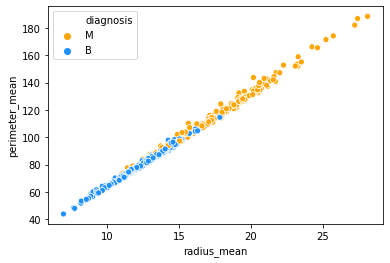

In [13]:
scatter = sns.scatterplot(bcdata['radius_mean'], bcdata['perimeter_mean'], 
                hue=bcdata['diagnosis'], 
                palette=['orange', 'dodgerblue'])

In [14]:
stats.pearsonr(bcdata['radius_mean'], bcdata['perimeter_mean'] )

(0.997855281493811, 0.0)

It seems the size of a sample of cells is not highly correlated to it's texture.


In [15]:
stats.pearsonr(bcdata['radius_mean'], bcdata['texture_mean'] )

(0.3237818909277331, 2.360374375922593e-15)

In [16]:
stats.pearsonr(bcdata['perimeter_mean'], bcdata['texture_mean'])

(0.32953305868657035, 7.041961237763314e-16)

Note the mean and standard deviation for each variable here.

In [17]:
print("radius_mean mean = ", round(bcdata.radius_mean.mean(), 2))
print("radius_mean std  = ", round(bcdata.radius_mean.std(), 2))

radius_mean mean =  14.13
radius_mean std  =  3.52


In [18]:
print("texture_mean mean = ", round(bcdata.texture_mean.mean(), 2))
print("texture_mean std  = ", round(bcdata.texture_mean.std(), 2))

texture_mean mean =  19.29
texture_mean std  =  4.3


In [19]:
print("perimeter_mean mean = ", round(bcdata.perimeter_mean.mean(),2))
print("perimeter_mean std  = ", round(bcdata.perimeter_mean.std(),2))

perimeter_mean mean =  91.97
perimeter_mean std  =  24.3


Plot the histograms for radius_mean, texture_mean and perimeter_mean. They seem to pass the eyeball test for being relatively normalized data.

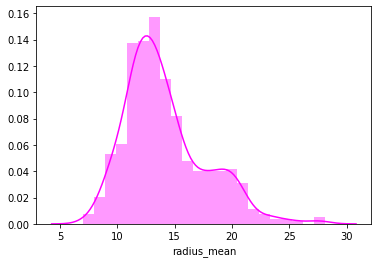

In [20]:
ax = sns.distplot(bcdata['radius_mean'], color='magenta')

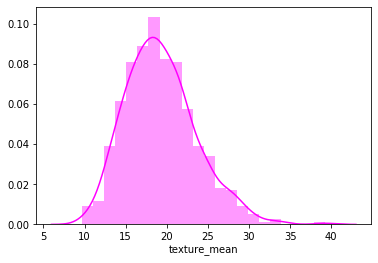

In [21]:
ax = sns.distplot(bcdata['texture_mean'], color='magenta')

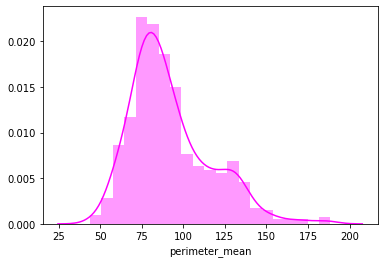

In [22]:
ax = sns.distplot(bcdata['perimeter_mean'], color='magenta')

A swarmplot for radius_mean. Note the considerable number of outliers. 

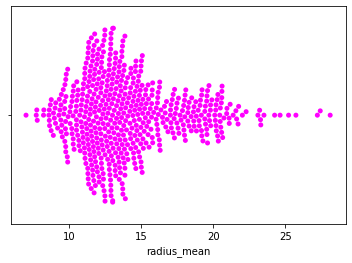

In [23]:
swarm = sns.swarmplot(bcdata['radius_mean'], color='magenta')

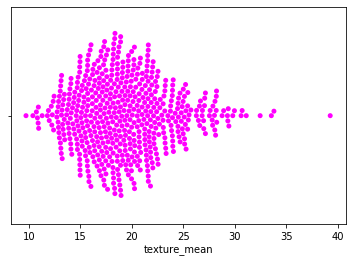

In [24]:
swarm = sns.swarmplot(bcdata['texture_mean'], color='magenta')

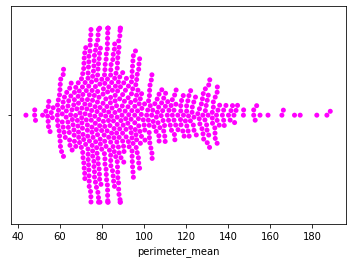

In [25]:
swarm = sns.swarmplot(bcdata['perimeter_mean'], color='magenta')

Do a shapiro test for radius_mean, texture_mean and perimeter_mean. All 3 variables return a W value close to 1. Unfortunately all three variables spectacularly fail the Shapiro test for normality because their p-values returned are all way below the 0.05 threshold. All three variables will be considered non-normal. I have decided to t-test all 3 of them anyway to see those results but not be using t-test results in the final analysis.
 

In [26]:
stats.shapiro(bcdata['radius_mean'])

(0.9410696029663086, 3.1061551985026026e-14)

In [27]:
stats.shapiro(bcdata['texture_mean'])

(0.9767200946807861, 7.281473557441132e-08)

In [28]:
stats.shapiro(bcdata['perimeter_mean'])

(0.9361826181411743, 7.01163031715385e-15)

Even though radius_mean, texture_mean and perimeter_mean all failed the shapiro test. Their skew and kurtosis are all in a decent range with kurtosis being well under +/-2.5 and skew under +/- 1.5. That makes a pretty good case for normality. I suspect the outliers that were spotted in the swarmplots and will show up elsewhere here and the fact that these are fairly small datasets that the shapiro tests were failed.

In [29]:
print(stats.describe(bcdata['radius_mean']))
print(stats.describe(bcdata['texture_mean']))
print(stats.describe(bcdata['perimeter_mean']))


DescribeResult(nobs=569, minmax=(6.981, 28.11), mean=14.127291739894552, variance=12.418920129526722, skewness=0.9398934455576345, kurtosis=0.8275836739140465)
DescribeResult(nobs=569, minmax=(9.71, 39.28), mean=19.289648506151142, variance=18.49890867905146, skewness=0.6487335672867015, kurtosis=0.74114542022429)
DescribeResult(nobs=569, minmax=(43.79, 188.5), mean=91.96903339191564, variance=590.4404795217704, skewness=0.9880369541677213, kurtosis=0.9531650486734948)


Boxplot radius_mean, texture_mean and perimeter mean and compare the data in the malignant versus benign samples. Notable here is the outliers a good distance from the means. Also in all 3 cases the means of malignant sample are significantly larger than the benign sample.


Divide the data into two datasets Malignant and Benign. From here all comparisons will be between these two datasets. The AB test of this experiment will be the malignant versus the benign results. Is the malignant results for the 3 variables radius_mean, texture_mean and perimeter mean significantly different than the benign results. If they are significantly different this will point to these values being important features in determining if a sample is malignant or benign. If they are not then these values might not be useful for diagnostic purposes.  

In [30]:
bcdata_M = bcdata[bcdata['diagnosis']== 'M']

bcdata_B = bcdata[bcdata['diagnosis']== 'B']


There are 212 Malignant results and 357 Benign results.

In [31]:
len(bcdata_M)

212

In [32]:
len(bcdata_B)

357

Another peak at the malignant and benign datasets.

In [33]:
bcdata_M.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [34]:
bcdata_B.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
19,B,13.540,14.36,87.46
20,B,13.080,15.71,85.63
21,B,9.504,12.44,60.34
37,B,13.030,18.42,82.61
46,B,8.196,16.84,51.71


Histograms for Benign (Blue) Vs Maligant (Orange) radius_mean.

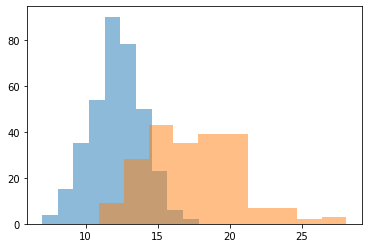

In [35]:
ax = plt.hist(bcdata_B['radius_mean'], alpha = .5)
ax = plt.hist(bcdata_M['radius_mean'], alpha = .5)
plt.show()

In [36]:
print("Benign radius_mean mean and std = ", 
      round(bcdata_B.radius_mean.mean(), 1), ":", 
      round(bcdata_B.radius_mean.std(), 1)) 

print("Malignant radius_mean mean and std = ", 
      round(bcdata_M.radius_mean.mean(), 1), ":", 
      round(bcdata_M.radius_mean.std(), 1)) 

Benign radius_mean mean and std =  12.1 : 1.8
Malignant radius_mean mean and std =  17.5 : 3.2


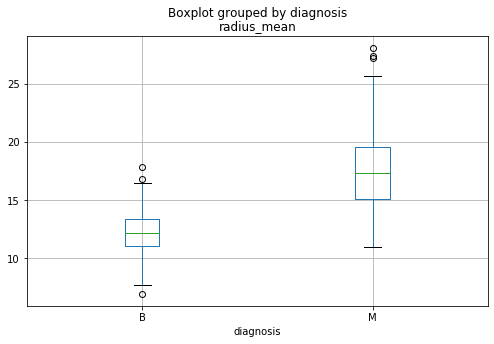

In [37]:
box = bcdata.boxplot('radius_mean', by='diagnosis', figsize=(8, 5))

In [38]:
print("Benign radius_mean mean and std = ", 
      round(bcdata_B.radius_mean.mean(), 1), ":", 
      round(bcdata_B.radius_mean.std(), 1)) 

print("Malignant radius_mean mean and std = ", 
      round(bcdata_M.radius_mean.mean(), 1), ":", 
      round(bcdata_M.radius_mean.std(), 1)) 

Benign radius_mean mean and std =  12.1 : 1.8
Malignant radius_mean mean and std =  17.5 : 3.2


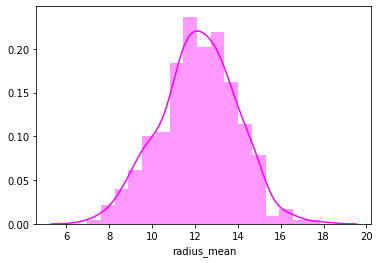

In [39]:
ax = sns.distplot(bcdata_B['radius_mean'], color='magenta')

Histograms for Benign Vs Maligant texture_mean.

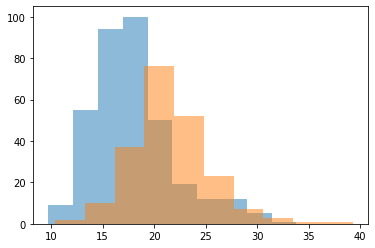

In [40]:
#ax = sns.distplot(bcdata_M['texture_mean'], color='magenta')

ax = plt.hist(bcdata_B['texture_mean'], alpha = .5)
ax = plt.hist(bcdata_M['texture_mean'], alpha = .5)
plt.show()

In [41]:
print("Benign texture_mean mean and std = ", 
      round(bcdata_B.texture_mean.mean(), 1), ":", 
      round(bcdata_B.texture_mean.std(), 1)) 

print("Malignant texture_mean mean and std = ", 
      round(bcdata_M.texture_mean.mean(), 1), ":", 
      round(bcdata_M.texture_mean.std(), 1)) 

Benign texture_mean mean and std =  17.9 : 4.0
Malignant texture_mean mean and std =  21.6 : 3.8


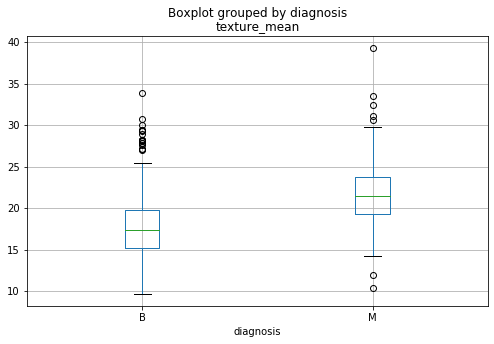

In [42]:
box = bcdata.boxplot('texture_mean', by='diagnosis', figsize=(8, 5))

In [43]:
print("Benign texture_mean mean and std = ", 
      round(bcdata_B.texture_mean.mean(), 1), ":", 
      round(bcdata_B.texture_mean.std(), 1)) 

print("Malignant texture_mean mean and std = ", 
      round(bcdata_M.texture_mean.mean(), 1), ":", 
      round(bcdata_M.texture_mean.std(), 1)) 

Benign texture_mean mean and std =  17.9 : 4.0
Malignant texture_mean mean and std =  21.6 : 3.8


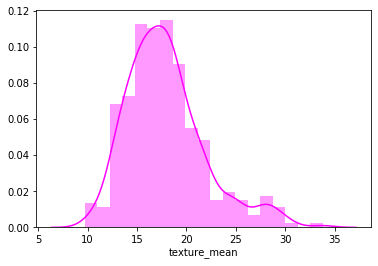

In [44]:
ax = sns.distplot(bcdata_B['texture_mean'], color='magenta')

Histograms for Benign Vs Maligant perimeter_mean.

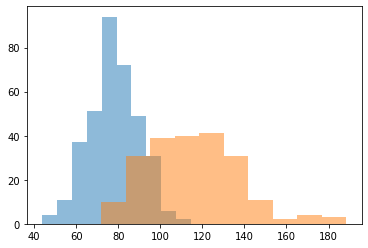

In [45]:
#ax = sns.distplot(bcdata_M['perimeter_mean'], color='magenta')

ax = plt.hist(bcdata_B['perimeter_mean'], alpha = .5)
ax = plt.hist(bcdata_M['perimeter_mean'], alpha = .5)
plt.show()

In [46]:
print("Benign perimeter_mean mean and std = ", 
      round(bcdata_B.perimeter_mean.mean(), 1), ":", 
      round(bcdata_B.perimeter_mean.std(), 1)) 

print("Malignant perimeter_mean mean and std = ", 
      round(bcdata_M.perimeter_mean.mean(), 1), ":", 
      round(bcdata_M.perimeter_mean.std(), 1)) 

Benign perimeter_mean mean and std =  78.1 : 11.8
Malignant perimeter_mean mean and std =  115.4 : 21.9


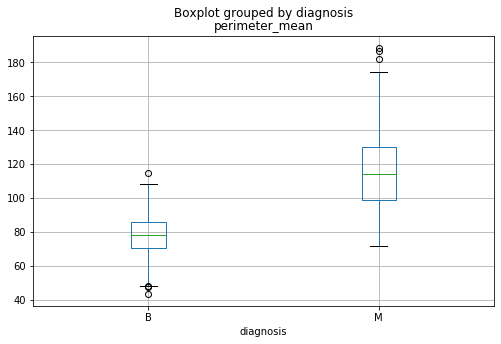

In [47]:
box = bcdata.boxplot('perimeter_mean', by='diagnosis', figsize=(8, 5))

In [48]:
print("Benign perimeter_mean mean and std = ", 
      round(bcdata_B.perimeter_mean.mean(), 1), ":", 
      round(bcdata_B.perimeter_mean.std(), 1)) 

print("Malignant perimeter_mean mean and std = ", 
      round(bcdata_M.perimeter_mean.mean(), 1), ":", 
      round(bcdata_M.perimeter_mean.std(), 1)) 

Benign perimeter_mean mean and std =  78.1 : 11.8
Malignant perimeter_mean mean and std =  115.4 : 21.9


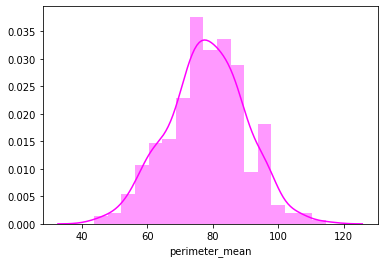

In [49]:
ax = sns.distplot(bcdata_B['perimeter_mean'], color='magenta')

Six swarmplots show that all three variables and the malignant and benign datasets all have outliers a noticeable distance from the mean.

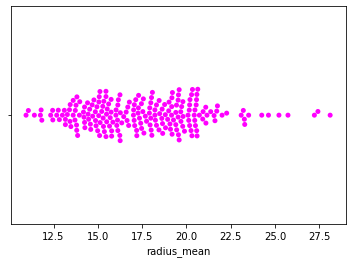

In [50]:
sns.swarmplot(bcdata_M['radius_mean'], color='magenta')

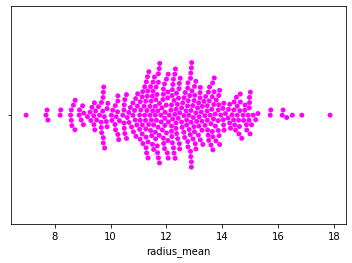

In [51]:
sns.swarmplot(bcdata_B['radius_mean'], color='magenta')

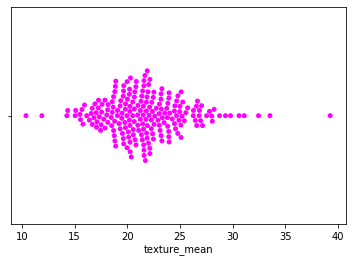

In [52]:
sns.swarmplot(bcdata_M['texture_mean'], color='magenta')

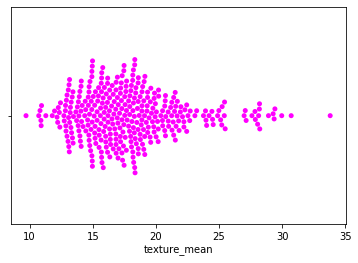

In [53]:
sns.swarmplot(bcdata_B['texture_mean'], color='magenta')

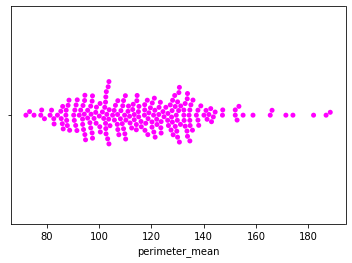

In [54]:
sns.swarmplot(bcdata_M['perimeter_mean'], color='magenta')

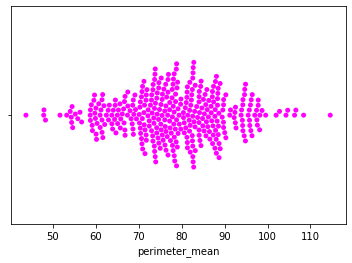

In [55]:
sns.swarmplot(bcdata_B['perimeter_mean'], color='magenta')

Again describe the data for all three variables in the 2 samples. The skew and kurtosis are all within range. The kurtosis for texture_mean in the malignant dataset is getting very close to out of range with a value of 2.29. But skew and kurtosis all indicate normalized data for both malignant and benign samples.

In [56]:
print(stats.describe(bcdata_M['radius_mean']))
print(stats.describe(bcdata_M['texture_mean']))
print(stats.describe(bcdata_M['perimeter_mean']))


DescribeResult(nobs=212, minmax=(10.95, 28.11), mean=17.462830188679245, variance=10.26543081462935, skewness=0.4983438269401485, kurtosis=0.33744620499587263)
DescribeResult(nobs=212, minmax=(10.38, 39.28), mean=21.60490566037736, variance=14.284392882053115, skewness=0.6985549130264693, kurtosis=2.2951980794284896)
DescribeResult(nobs=212, minmax=(71.9, 188.5), mean=115.36537735849056, variance=477.6258704730394, skewness=0.6006419795948119, kurtosis=0.5492077385280698)


In [57]:
print(stats.describe(bcdata_B['radius_mean']))
print(stats.describe(bcdata_B['texture_mean']))
print(stats.describe(bcdata_B['perimeter_mean']))


DescribeResult(nobs=357, minmax=(6.981, 17.85), mean=12.146523809523808, variance=3.1702217220438738, skewness=-0.08344660198964896, kurtosis=-0.028871551594101152)
DescribeResult(nobs=357, minmax=(9.71, 33.81), mean=17.914761904761903, variance=15.961020518994113, skewness=0.9772157090288104, kurtosis=1.1858758625694934)
DescribeResult(nobs=357, minmax=(43.79, 114.6), mean=78.075406162465, variance=139.41558220816415, skewness=-0.06441193810264673, kurtosis=-0.03299354965402257)


Here I test all three variables to the 2 datasets. In this case the malignant data all fail the shapiro test but the benign data pass the shapiro test easily. This is interesting. What is it about the malignant data that causes it to fail the normality test? 

Below I tested the number of unique values of each variable we are testing. There is some repeated values, but I do not think there are so many to severely throw off normality tests.


In [58]:
print(len(bcdata_M))
print(bcdata_M.radius_mean.nunique())
print(bcdata_M.texture_mean.nunique())
print(bcdata_M.perimeter_mean.nunique())

212
196
199
191


In [59]:
print(len(bcdata_B))
print(bcdata_B.radius_mean.nunique())
print(bcdata_B.texture_mean.nunique())
print(bcdata_B.perimeter_mean.nunique())

357
284
311
338


In [60]:
stats.shapiro(bcdata_M['radius_mean'])

(0.9776597619056702, 0.0018945835763588548)

In [61]:
stats.shapiro(bcdata_M['texture_mean'])

(0.9690946340560913, 0.00013415660941973329)

In [62]:
stats.shapiro(bcdata_M['perimeter_mean'])

(0.9730151891708374, 0.00043255911441519856)

In [63]:
stats.shapiro(bcdata_B['radius_mean'])

(0.9966526031494141, 0.6678557395935059)

In [64]:
stats.shapiro(bcdata_B['texture_mean'])

(0.9441728591918945, 2.384618336126465e-10)

In [65]:
stats.shapiro(bcdata_B['perimeter_mean'])

(0.9970958232879639, 0.7793931365013123)

Below I test the 3 variables and two datasets for outliers by making a top ten list of zscores for results that reside far from the mean. Across the 3 variables and both malignant and benign data there are significant outliers everywhere. But yet the malignant data failed the shapiro test.


In [66]:
def print_top5bot5(zlist):
  zlist.sort()
  zlist.size
  print(zlist[0:5])
  print(zlist[-5:-1]) 
  print(zlist[-1])

In [67]:
print_top5bot5(stats.zscore(bcdata_M['radius_mean']))

[-2.03754809 -1.99687741 -1.89050793 -1.78413845 -1.77162439]
[2.42684149 2.58639571 3.0525443  3.11511459]
3.330982057202953


In [68]:
print_top5bot5(stats.zscore(bcdata_B['radius_mean']))

[-2.90521754 -2.50589609 -2.48452396 -2.4670888  -2.22187168]
[2.26290189 2.33601709 2.44850201 2.63972636]
3.20777518398041


In [69]:
print_top5bot5(stats.zscore(bcdata_M['texture_mean']))

[-2.97699777 -2.57652522 -1.94796896 -1.92675187 -1.7384502 ]
[2.39092573 2.52353253 2.88157091 3.17065375]
4.687675603281357


In [70]:
print_top5bot5(stats.zscore(bcdata_B['texture_mean']))

[-2.056576   -1.80341305 -1.77834741 -1.76080146 -1.75578833]
[2.87132863 2.88636801 3.02172247 3.20971476]
3.984243003963385


In [71]:
print_top5bot5(stats.zscore(bcdata_M['perimeter_mean']))

[-1.99354588 -1.92933468 -1.85136393 -1.73303185 -1.71697905]
[2.57462267 2.69845857 3.06079322 3.28094592]
3.3543301559559904


In [72]:
print_top5bot5(stats.zscore(bcdata_B['perimeter_mean']))

[-2.90778806 -2.55751761 -2.55242894 -2.52189689 -2.23608298]
[2.25806501 2.39376301 2.41920638 2.57186663]
3.0976963631991823


Making the assumption that the distribution of radius_mean is normalized I ttest radius_mean of the Malignant dataset versus the Benign dataset. It returns a very low p-value and rejects the Null handily.

In [73]:
stats.ttest_ind(bcdata_M['radius_mean'], bcdata_B['radius_mean'])


Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

Just in case radius_mean is not normal and the ttest is meaningless then I kruskal test radius_mean and it also rejects the NULL handily.

In [74]:
stats.kruskal(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

KruskalResult(statistic=305.00114169591234, pvalue=2.680528928198788e-68)

In [75]:
stats.median_test(bcdata_M['radius_mean'], bcdata_B['radius_mean'])


(236.52797526117857, 2.247938676287646e-53, 13.37, array([[195,  89],
        [ 17, 268]], dtype=int64))

In [76]:
stats.mannwhitneyu(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

MannwhitneyuResult(statistic=4729.0, pvalue=1.3464713863982824e-68)

Here texture_mean fails to reject the NULL for all 4 tests.

Here I ttest texture_mean Benign VS Malignant. It passes.

In [77]:
stats.ttest_ind(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

Here texture_mean also passes kruskal test.

In [78]:
stats.kruskal(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)

In [79]:
stats.median_test(bcdata_M['texture_mean'], bcdata_B['texture_mean'])


(107.13187769388985, 4.165102795584876e-25, 18.84, array([[166, 118],
        [ 46, 239]], dtype=int64))

In [80]:
stats.mannwhitneyu(bcdata_M['texture_mean'], bcdata_B['texture_mean'])

MannwhitneyuResult(statistic=16966.5, pvalue=1.7143132523721134e-28)

And perimeter_mean fails to reject the NULL.

Here I ttest perimeter_mean Benign VS Malignant. It passes.

In [81]:
stats.ttest_ind(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

Here perimeter_mean Benign VS Malignant passes Kruskal.

In [82]:
stats.kruskal(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])


KruskalResult(statistic=318.21988483157037, pvalue=3.537139549987364e-71)

In [83]:
stats.median_test(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])


(241.89208463622737, 1.5210841058376233e-54, 86.24, array([[196,  88],
        [ 16, 269]], dtype=int64))

In [84]:
stats.mannwhitneyu(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

MannwhitneyuResult(statistic=4019.0, pvalue=1.7769351129819374e-71)

Just being curious I run one way anova on all 3 variables.

In [85]:
print("For radius_mean: ")
stats.f_oneway(bcdata_M['radius_mean'], bcdata_B['radius_mean'])

For radius_mean: 


F_onewayResult(statistic=646.9810209786452, pvalue=8.46594057226382e-96)

In [86]:
print("For texture_mean: ")
stats.f_oneway(bcdata_M['texture_mean'], bcdata_B['texture_mean'])

For texture_mean: 


F_onewayResult(statistic=118.09605934497965, pvalue=4.0586360478986136e-25)

In [87]:
print("For perimeter_mean: ")
stats.f_oneway(bcdata_M['perimeter_mean'], bcdata_B['perimeter_mean'])

For perimeter_mean: 


F_onewayResult(statistic=697.2352724765257, pvalue=8.43625103617395e-101)

In [88]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = round(mean_difference - margin_of_error, 2)
    ci_upper = round(mean_difference + margin_of_error, 2)
    return("The difference in means at the 95% confidence interval (two-tail)" 
               +"\n" +"is between " +str(ci_lower)+" and "+str(ci_upper)+".")



I run a 95% confidence interval on all three variables. 
The standard deviation for the radius_mean for the entire data was 3.5 and the difference between malignant and benign is 130% to 160% of the std. That is definitely a significant difference. 
Texture_mean is 85% to 100% difference of the standard deviation. Perimeter_mean is %140 to %166 of the original standard deviation as well. This was noticeable in the boxplot and comparing the histogram  plots of the malignant and benign datasets.

The standard deviation of the entire data was 3.5, 4.3 and 91.9 respectively for those 3 variables.



In [101]:
print("For radius_mean: ")
print(get_95_ci(bcdata_B['radius_mean'], bcdata_M['radius_mean']));
print("Total sample radius_mean mean and std = ", 
      round(bcdata.radius_mean.mean(), 2), ":", 
      round(bcdata.radius_mean.std(), 2)) 

For radius_mean: 
The difference in means at the 95% confidence interval (two-tail)
is between 4.85 and 5.79.
Total sample radius_mean mean and std =  14.13 : 3.52


In [102]:
print("For texture_mean: ")
print(get_95_ci(bcdata_B['texture_mean'], bcdata_M['texture_mean']));
print("Total sample texture_mean mean and std = ", 
      round(bcdata.texture_mean.mean(), 2), ":", 
      round(bcdata.texture_mean.std(), 2)) 

For texture_mean: 
The difference in means at the 95% confidence interval (two-tail)
is between 3.03 and 4.35.
Total sample texture_mean mean and std =  19.29 : 4.3


In [103]:
print("For perimeter_mean: ")
print(get_95_ci(bcdata_B['perimeter_mean'], bcdata_M['perimeter_mean']));
print("Total sample perimeter_mean mean and std = ", 
      round(bcdata.perimeter_mean.mean(), 2), ":", 
      round(bcdata.perimeter_mean.std(), 2)) 

For perimeter_mean: 
The difference in means at the 95% confidence interval (two-tail)
is between 34.1 and 40.48.
Total sample perimeter_mean mean and std =  91.97 : 24.3


Last thing is to run a pointplot to show visually there is a significant difference between the malignant and benign data sets for radius_mean, texture_mean, and perimeter_mean. The values are higher in the malignant dataset for all three values. 

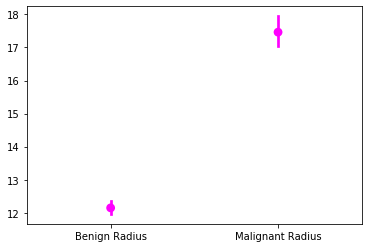

In [92]:
g = sns.pointplot(data=[bcdata_B['radius_mean'], bcdata_M['radius_mean']], 
                  join=False, color='magenta')                        
ticks = g.set(xticklabels = ['Benign Radius', 'Malignant Radius'])
plt.show()

In [93]:
print("Benign radius_mean mean and std = ", 
      round(bcdata_B.radius_mean.mean(), 1), ":", 
      round(bcdata_B.radius_mean.std(), 1)) 

print("Malignant radius_mean mean and std = ", 
      round(bcdata_M.radius_mean.mean(), 1), ":", 
      round(bcdata_M.radius_mean.std(), 1)) 

Benign radius_mean mean and std =  12.1 : 1.8
Malignant radius_mean mean and std =  17.5 : 3.2


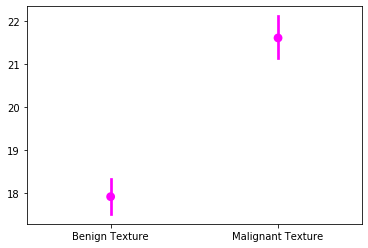

In [94]:
g = sns.pointplot(data=[bcdata_B['texture_mean'], bcdata_M['texture_mean']], 
                  join=False, color='magenta')              
ticks = g.set(xticklabels = ['Benign Texture', 'Malignant Texture'])
plt.show()

In [95]:
print("Benign texture_mean mean and std = ", 
      round(bcdata_B.texture_mean.mean(), 1), ":", 
      round(bcdata_B.texture_mean.std(), 1)) 

print("Malignant texture_mean mean and std = ", 
      round(bcdata_M.texture_mean.mean(), 1), ":", 
      round(bcdata_M.texture_mean.std(), 1)) 

Benign texture_mean mean and std =  17.9 : 4.0
Malignant texture_mean mean and std =  21.6 : 3.8


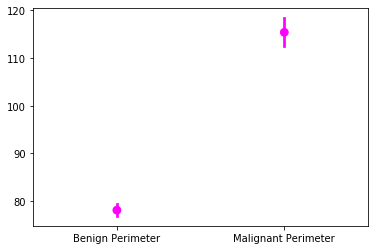

In [96]:
g = sns.pointplot(data=[ bcdata_B['perimeter_mean'], bcdata_M['perimeter_mean']], 
                  join=False, color='magenta')              
ticks = g.set(xticklabels = ['Benign Perimeter', 'Malignant Perimeter'])
plt.show()

In [97]:
print("Benign perimeter_mean mean and std = ", 
      round(bcdata_B.perimeter_mean.mean(), 1), ":", 
      round(bcdata_B.perimeter_mean.std(), 1)) 

print("Malignant perimeter_mean mean and std = ", 
      round(bcdata_M.perimeter_mean.mean(), 1), ":", 
      round(bcdata_M.perimeter_mean.std(), 1)) 

Benign perimeter_mean mean and std =  78.1 : 11.8
Malignant perimeter_mean mean and std =  115.4 : 21.9


<h2 align="center">Benign VS Malignant FNA Samples</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/SMEAR.png">


<h2 align="center"> </h2> <img src=https://scontent-ort2-1.xx.fbcdn.net/v/t1.0-9/83470873_10156929336593061_3922600176966959104_o.jpg?_nc_cat=103&_nc_ohc=R8gnAB7eoDgAX8H36Wx&_nc_ht=scontent-ort2-1.xx&oh=38df41544f707f15f62031f925eaad47&oe=5ED8E05A">

<h2 align="center">Measurement Variables</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/measure.png">


<h2 align="center">Concavity VS Compactness</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/concave.png">


<h2 align="center">Texture VS Smoothness</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/smooth.png">


<h2 align="center">Symmetry VS Fractals</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/symmetry.png">


Summary:

The conclusion of these results is that for radius_mean, texture_mean and perimeter_mean the values for all three would be larger in a malignant sample of breast cancer cells collected from a FNA needle biopsy. There are 28 other variables just in this data provided and those would also need to be analyzed to understand these results. 

The data assembled for this project may have been assembled specifically for machine learning testing. It just happened to fit the purposes for an AB test for this project. 

The other issue is the size of the dataset. It may be quite large for these sorts for medical testing studies. It may be that medical studies just have to deal with smaller and thus non-normal datasets and being able to work with these problems is the nature of the problem.

If I could collect more data for this project I would like to have data from other states besides Wisconsin. Also the data was collected in 1995 so it is 25 years old. The instruments used to create this data are probably much better than what was used back then. If the images are digitized, I am sure the images collected today are much higher resolution. Also since 1995 there is been a lot of work with genetic testing. It would be nice to see what genetic testing data collected from needle biopsy could or would be included from cell samples taken today. And before the needle biopsy CT scans and MRI scans of the patient to show the entire tumor and perhaps other tumors in the same area would be even more data to consider. Size of the overall tumor was not considered here but would be signicant information to add to the overall picture and improve the diagnostic process. 
